In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import re
import math
from v_finite_polygons import voronoi_finite_polygons_2d
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon, Patch
import matplotlib.image as mpimg
from matplotlib.ticker import ScalarFormatter

In [2]:
InteriorSensors = {
    'S-01':[3.5,5],
    'S-02':[2,5],
    'S-03':[3.5,6.5],
    'S-04':[3.5,5.1],
    'S-05':[3.5,3.5],
    'S-06':[5,5],
    'S-07':[1,9.9],
    'S-08':[1,10],
    'S-09':[10-.1,10],
    'S-10':[10,10],
    'S-11':[10,1.1],
    'S-12':[10,1],
    'S-13':[1,1.1],
    'S-15':[1,1],
}

In [3]:
ZoneAssignments = pd.read_csv('./dataInfo/ZoneAssignments.csv')
key = list(ZoneAssignments.keys())[0]
numZones = len(set(ZoneAssignments[key]))

In [4]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData\\S-01.csv', './interpolatedData\\S-03.csv', './interpolatedData\\S-04.csv', './interpolatedData\\S-05.csv', './interpolatedData\\S-06.csv', './interpolatedData\\S-07.csv', './interpolatedData\\S-08.csv', './interpolatedData\\S-09.csv', './interpolatedData\\S-11.csv', './interpolatedData\\S-12.csv', './interpolatedData\\S-13.csv', './interpolatedData\\S-14.csv', './interpolatedData\\S-15.csv', './interpolatedData\\S-BU1.csv']


In [5]:
avgData = glob.glob("./stretchedAvgData/*.csv")
print(avgData)

['./stretchedAvgData\\OR16 Blocked 1.csv', './stretchedAvgData\\OR16 Blocked 2.csv', './stretchedAvgData\\OR16 Unblocked.csv', './stretchedAvgData\\OR7 Blocked.csv', './stretchedAvgData\\OR7 Unblocked.csv']


In [6]:
expData = glob.glob("./stretchedExpirementData/*.csv")
print(expData)

['./stretchedExpirementData\\OR16 Blocked 1 Exp 1.csv', './stretchedExpirementData\\OR16 Blocked 1 Exp 2.csv', './stretchedExpirementData\\OR16 Blocked 1 Exp 3.csv', './stretchedExpirementData\\OR16 Blocked 2 Exp 1.csv', './stretchedExpirementData\\OR16 Blocked 2 Exp 2.csv', './stretchedExpirementData\\OR16 Blocked 2 Exp 3.csv', './stretchedExpirementData\\OR16 Unblocked Exp 1.csv', './stretchedExpirementData\\OR16 Unblocked Exp 2.csv', './stretchedExpirementData\\OR16 Unblocked Exp 3.csv', './stretchedExpirementData\\OR7 Blocked Exp 1.csv', './stretchedExpirementData\\OR7 Blocked Exp 2.csv', './stretchedExpirementData\\OR7 Blocked Exp 3.csv', './stretchedExpirementData\\OR7 Unblocked Exp 1.csv', './stretchedExpirementData\\OR7 Unblocked Exp 2.csv', './stretchedExpirementData\\OR7 Unblocked Exp 3.csv']


In [7]:
df = {}
for x in allFiles:
    name = x.split('\\')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [8]:
mergedData = pd.read_csv('./mergedData/mergedFrame.csv',parse_dates=[0])

In [9]:
stAvgDf = {}
for x in avgData:
    name = x.split('\\')[1].split('.')[0]
    stAvgDf[name] = pd.read_csv(x)

In [10]:
stExpDf = {}
for x in expData:
    name = x.split('\\')[1].split('.')[0]
    stExpDf[name] = pd.read_csv(x)


Text(0.5, 1.0, 'Variance in Particles')

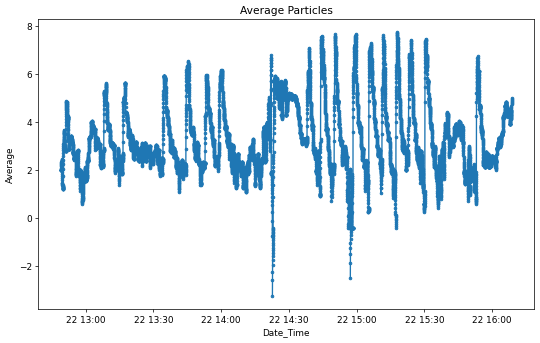

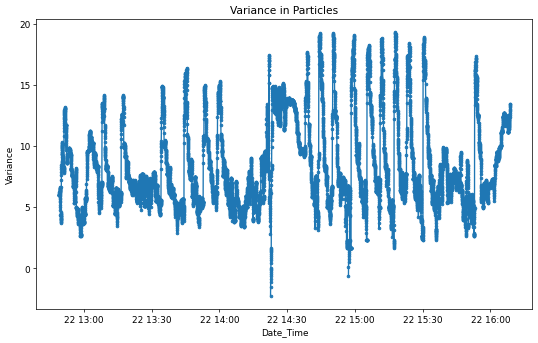

In [11]:
split = len(mergedData)

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Average'][:split])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Variance'])[:split],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

# fig = plt.figure(1, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Average'][split:])/np.log(3),'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Average')
# plt.title('Average Particles')

# fig = plt.figure(4, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Variance'])[split:],'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Variance')
# plt.title('Variance in Particles')

In [12]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20

### All Sensors Plotted

In [13]:
mergedData

Date_Time  S-01  S-03  S-04  S-05  S-06  S-07  S-08  S-09  \
0     2020-12-22 12:49:00   0.0   0.0   0.0   0.0  18.0   0.0   0.0   9.0   
1     2020-12-22 12:49:01   0.0   0.9   0.0   0.0  18.0   0.0   0.0   9.0   
2     2020-12-22 12:49:02   0.0   1.8   0.0   0.0  18.0   0.0   0.0   9.0   
3     2020-12-22 12:49:03   0.0   2.7   0.0   0.0  18.0   0.0   0.0   9.0   
4     2020-12-22 12:49:04   0.0   3.6   0.0   0.0  18.0   0.0   0.0   9.0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
11976 2020-12-22 16:08:36  40.8   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11977 2020-12-22 16:08:37  42.6   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11978 2020-12-22 16:08:38  44.4   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11979 2020-12-22 16:08:39  46.2   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11980 2020-12-22 16:08:40  48.0   0.0   0.0   0.0   0.0   9.0   0.0   0.0   

       S-11  S-12    S-13  S-14  S-15  S-BU1     Average       Variance  
0       0.0   0.0     0.0  21.0   0.0   78.0    9.000000     414.000000  
1       0.0   0.0     0.9  18.9   0.0   78.0    8.978571     412.388265  
2       0.0   0.0     1.8  16.8   0.0   78.0    8.957143     410.776531  
3       0.0   0.0     2.7  14.7   0.0   78.0    8.935714     409.164796  
4       0.0   0.0     3.6  12.6   0.0   78.0    8.914286     407.553061  
...     ...   ...     ...   ...   ...    ...         ...            ...  
11976   0.0  13.2  2730.0   5.4   9.0    7.8  201.085714  521728.432653  
11977   0.0   9.9  2866.5   6.3   9.0    9.1  210.885714  568556.518367  
11978   0.0   6.6  3003.0   7.2   9.0   10.4  220.685714  615384.604082  
11979   0.0   3.3  3139.5   8.1   9.0   11.7  230.485714  662212.689796  
11980   0.0   0.0  3276.0   9.0   9.0   13.0  240.285714  709040.775510  

[11981 rows x 17 columns]

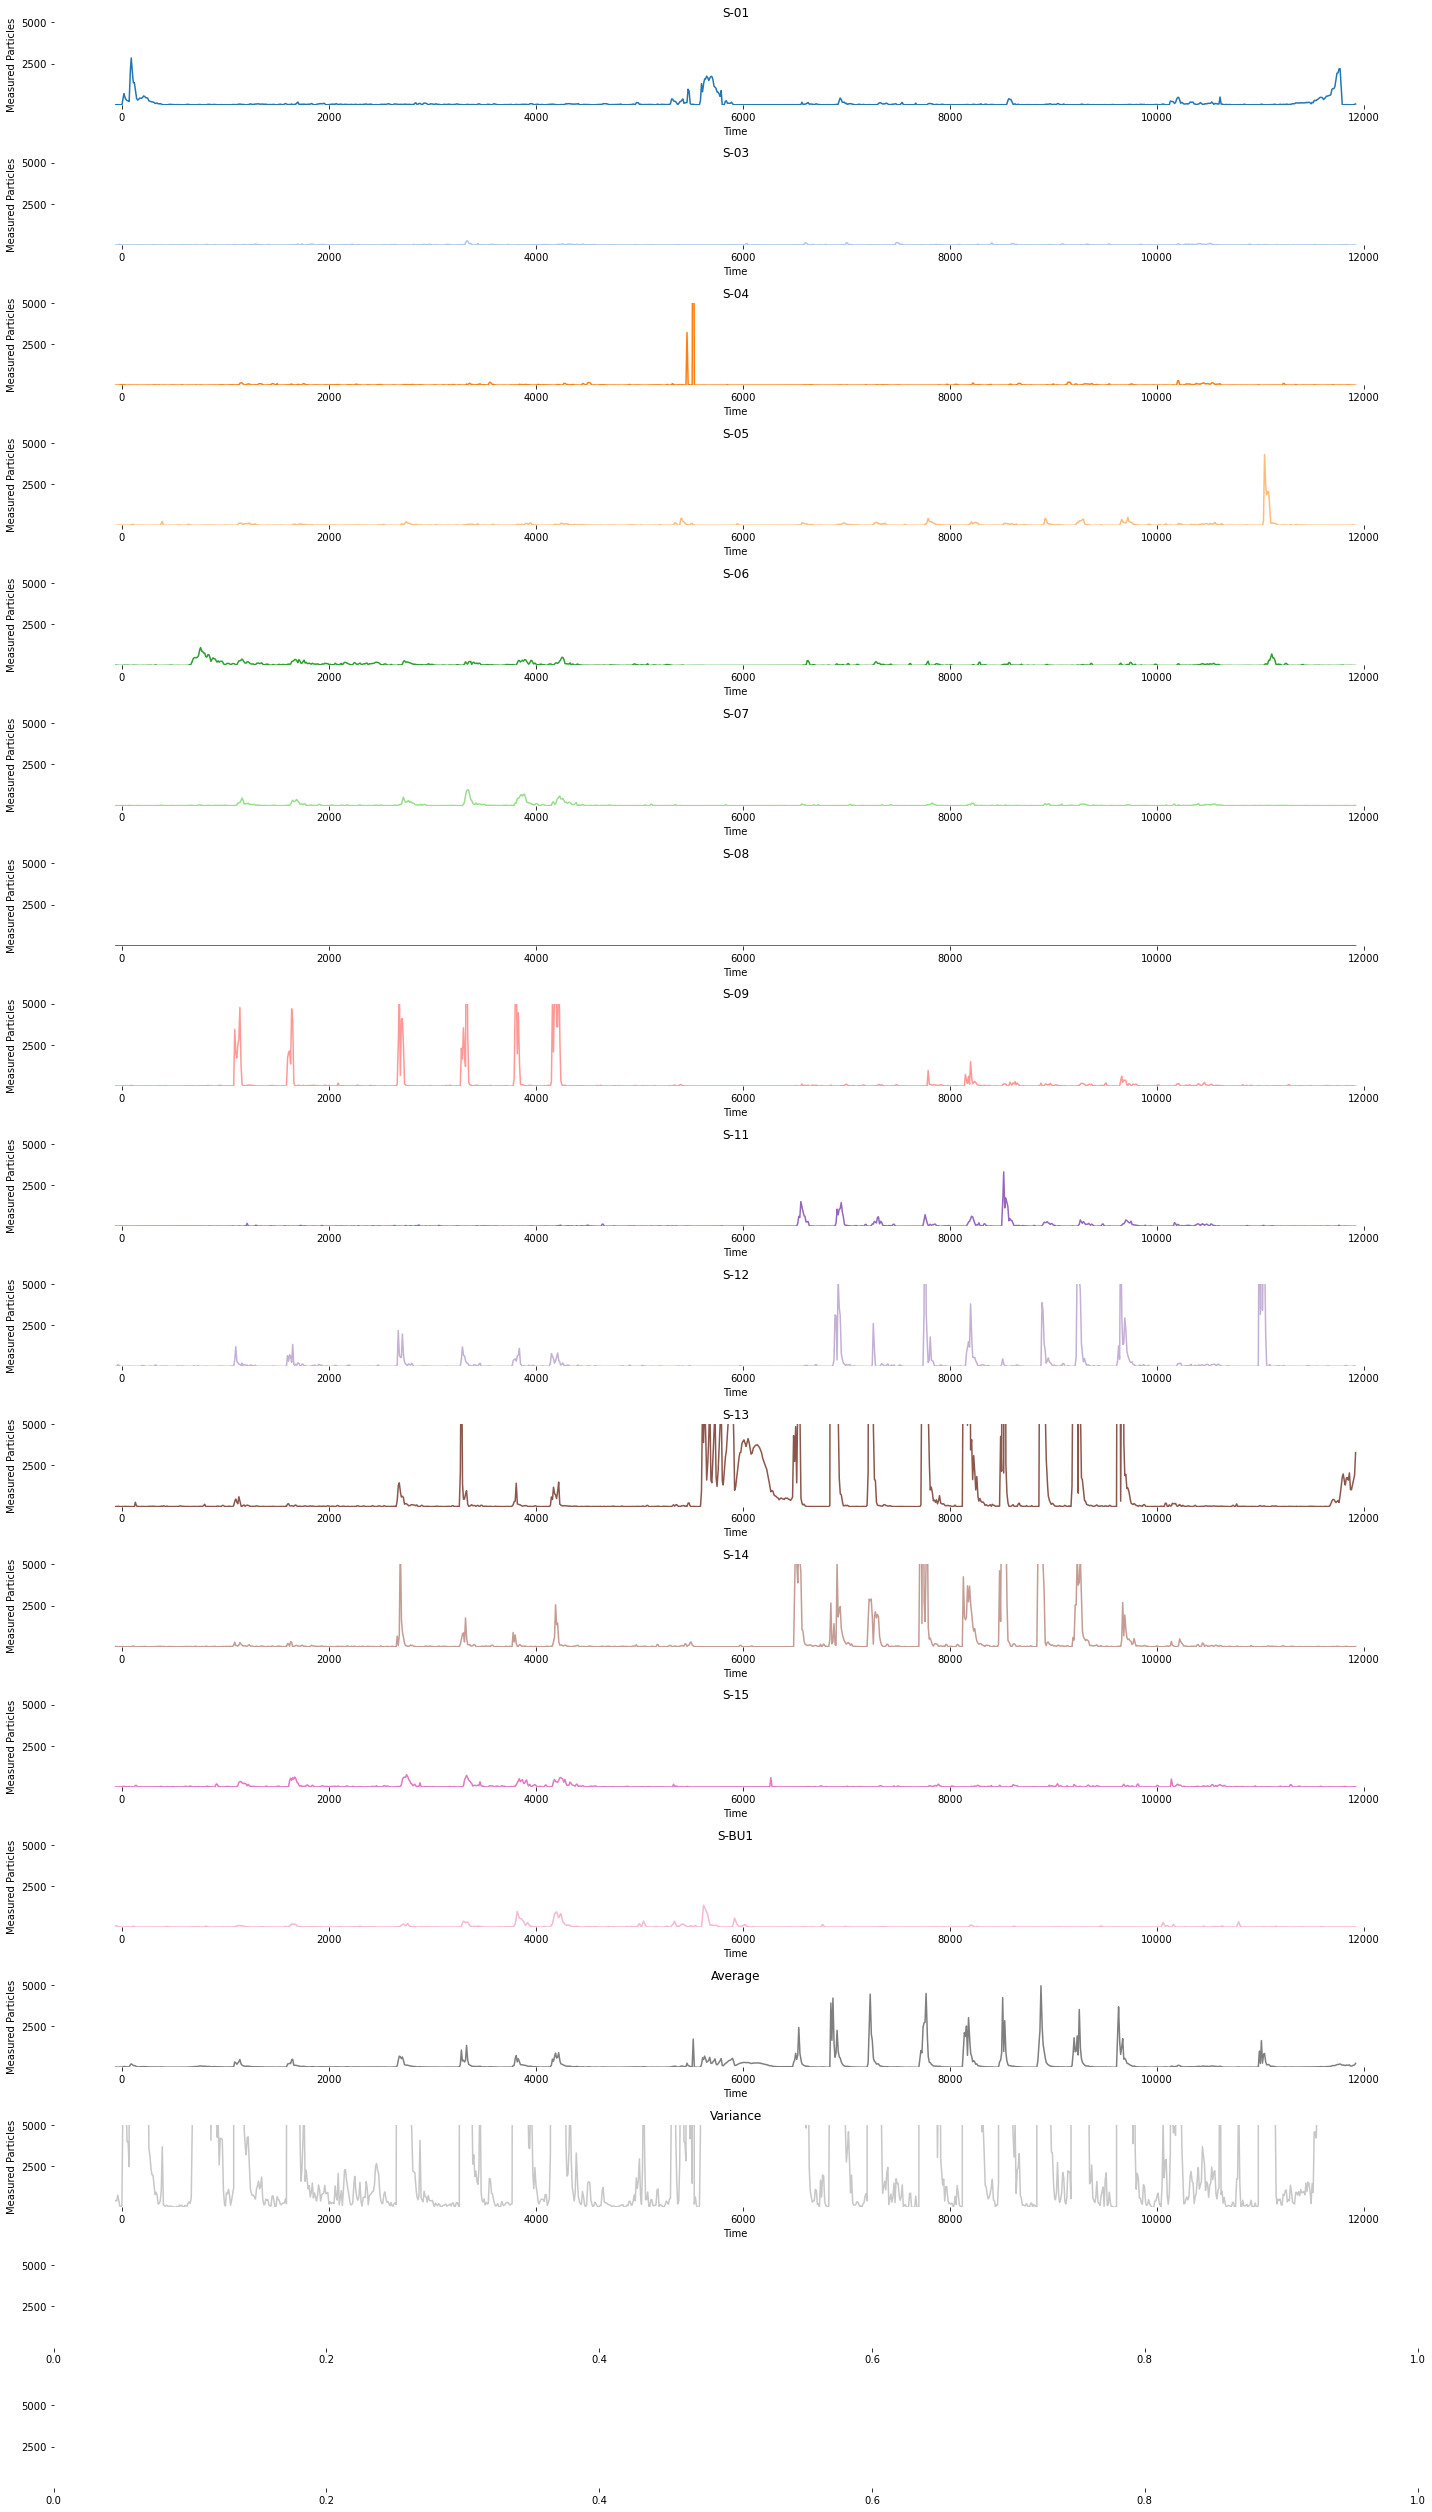

In [14]:

fig,sPlt=plt.subplots(18,sharex=False,sharey=False,figsize=(20,35))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    yData = (DataFrame[sensor])
    xData = [i for i in range(-60,len(yData)-60)]

    sPlt[idx].plot(xData,yData,color = color[idx],label = sensor)

    sPlt[idx].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[idx].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[idx].set(title=sensor,xlabel='Time',ylabel='Measured Particles')



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    # ax.legend(prop={'size':9})
    ax.set_ylim([1,5000])
    # ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


### Zones Plotted Showing Sensor

In [15]:
InteriorSensors

{'S-01': [3.5, 5],
 'S-02': [2, 5],
 'S-03': [3.5, 6.5],
 'S-04': [3.5, 5.1],
 'S-05': [3.5, 3.5],
 'S-06': [5, 5],
 'S-07': [1, 9.9],
 'S-08': [1, 10],
 'S-09': [9.9, 10],
 'S-10': [10, 10],
 'S-11': [10, 1.1],
 'S-12': [10, 1],
 'S-13': [1, 1.1],
 'S-15': [1, 1]}

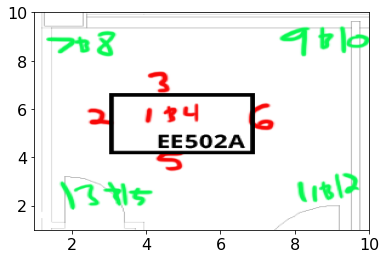

In [16]:
img = mpimg.imread("./Graphs, Images, and Animations/ICU1.png")
imgplot = plt.imshow(img, aspect='auto', extent=(1,10,1,10), alpha=1, zorder=-1)

### Check the Spatial Zoning distribution

In [17]:
if re.match('EE502',key):
    print('match')
else:
    print('no match')

no match


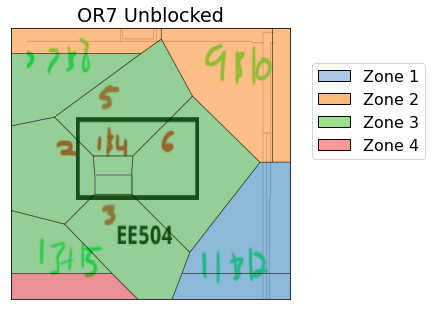

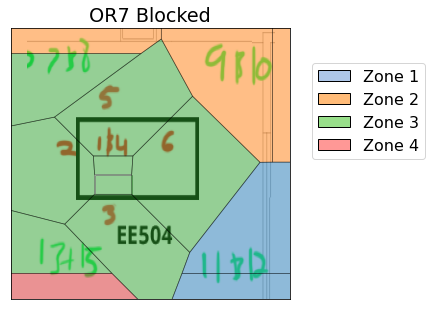

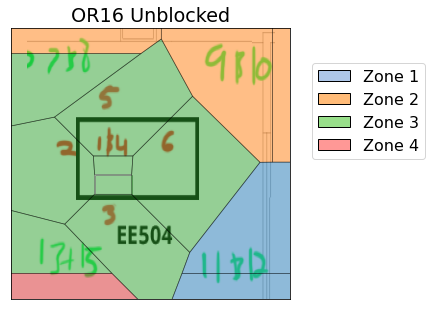

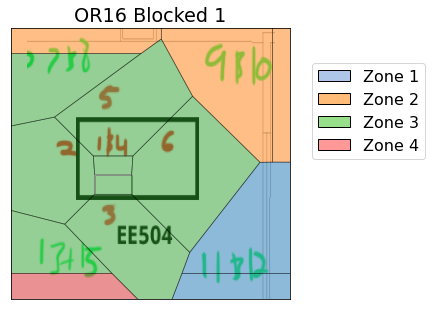

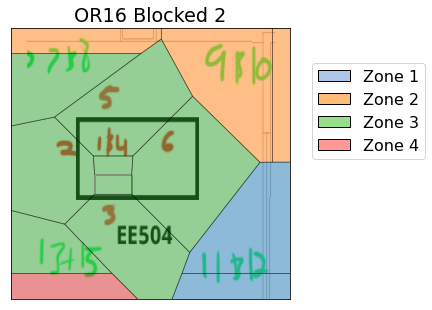

In [18]:
# ZoneAssignments.keys()
ISC = InteriorSensors
# fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(10,10))
for iteration,key in enumerate(ZoneAssignments.keys()):
    x=[]
    y=[]
    points = []
    for idx,sensor in enumerate(InteriorSensors):
        points.append(ISC[sensor])
    vor = Voronoi(points)
    regions, vertices = voronoi_finite_polygons_2d(vor)
    polygons = []
    for reg in regions:
        polygon = vertices[reg]
        polygons.append(polygon)

    plt.figure(figsize=(5,5))
    if re.match('EE502',key):
        route = './Graphs, Images, and Animations/ICU1.png'
    else:
        route = './Graphs, Images, and Animations/ICU2.png'
    img = mpimg.imread(route)
    plt.imshow(img, aspect='auto', extent=(0,10,0,11), alpha=1, zorder=-1)
    ax = plt.subplot(111)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    ax.axis("equal")

    # Set limits
    ax.set_xlim(0,10)
    ax.set_ylim(0,11)

    # Add polygons 
    for idx,poly in enumerate(polygons):
        colored_cell = Polygon(poly,linewidth=0.7, alpha=0.5,facecolor=color[ZoneAssignments[key][idx]*2],edgecolor="black")
        ax.add_patch(colored_cell)
    plt.title(key)
    # got lazy here and explicitly defined the zones
    legend_elements = [Patch(facecolor=color[1], edgecolor='black',label='Zone 1'),
                       Patch(facecolor=color[3], edgecolor='black',label='Zone 2'),
                       Patch(facecolor=color[5], edgecolor='black',label='Zone 3'),
                       Patch(facecolor=color[7], edgecolor='black',label='Zone 4'),]
    plt.legend(handles = legend_elements,bbox_to_anchor=(1.05, .9))
    plt.show()
    # voronoi_plot_2d(vor)
        # sPlt[iteration%2][0 if iteration < 2 else 1].plot(X,Y,'o',color = C,mew = 10)


    


In [19]:
mergedData

Date_Time  S-01  S-03  S-04  S-05  S-06  S-07  S-08  S-09  \
0     2020-12-22 12:49:00   0.0   0.0   0.0   0.0  18.0   0.0   0.0   9.0   
1     2020-12-22 12:49:01   0.0   0.9   0.0   0.0  18.0   0.0   0.0   9.0   
2     2020-12-22 12:49:02   0.0   1.8   0.0   0.0  18.0   0.0   0.0   9.0   
3     2020-12-22 12:49:03   0.0   2.7   0.0   0.0  18.0   0.0   0.0   9.0   
4     2020-12-22 12:49:04   0.0   3.6   0.0   0.0  18.0   0.0   0.0   9.0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
11976 2020-12-22 16:08:36  40.8   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11977 2020-12-22 16:08:37  42.6   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11978 2020-12-22 16:08:38  44.4   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11979 2020-12-22 16:08:39  46.2   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11980 2020-12-22 16:08:40  48.0   0.0   0.0   0.0   0.0   9.0   0.0   0.0   

       S-11  S-12    S-13  S-14  S-15  S-BU1     Average       Variance  
0       0.0   0.0     0.0  21.0   0.0   78.0    9.000000     414.000000  
1       0.0   0.0     0.9  18.9   0.0   78.0    8.978571     412.388265  
2       0.0   0.0     1.8  16.8   0.0   78.0    8.957143     410.776531  
3       0.0   0.0     2.7  14.7   0.0   78.0    8.935714     409.164796  
4       0.0   0.0     3.6  12.6   0.0   78.0    8.914286     407.553061  
...     ...   ...     ...   ...   ...    ...         ...            ...  
11976   0.0  13.2  2730.0   5.4   9.0    7.8  201.085714  521728.432653  
11977   0.0   9.9  2866.5   6.3   9.0    9.1  210.885714  568556.518367  
11978   0.0   6.6  3003.0   7.2   9.0   10.4  220.685714  615384.604082  
11979   0.0   3.3  3139.5   8.1   9.0   11.7  230.485714  662212.689796  
11980   0.0   0.0  3276.0   9.0   9.0   13.0  240.285714  709040.775510  

[11981 rows x 17 columns]

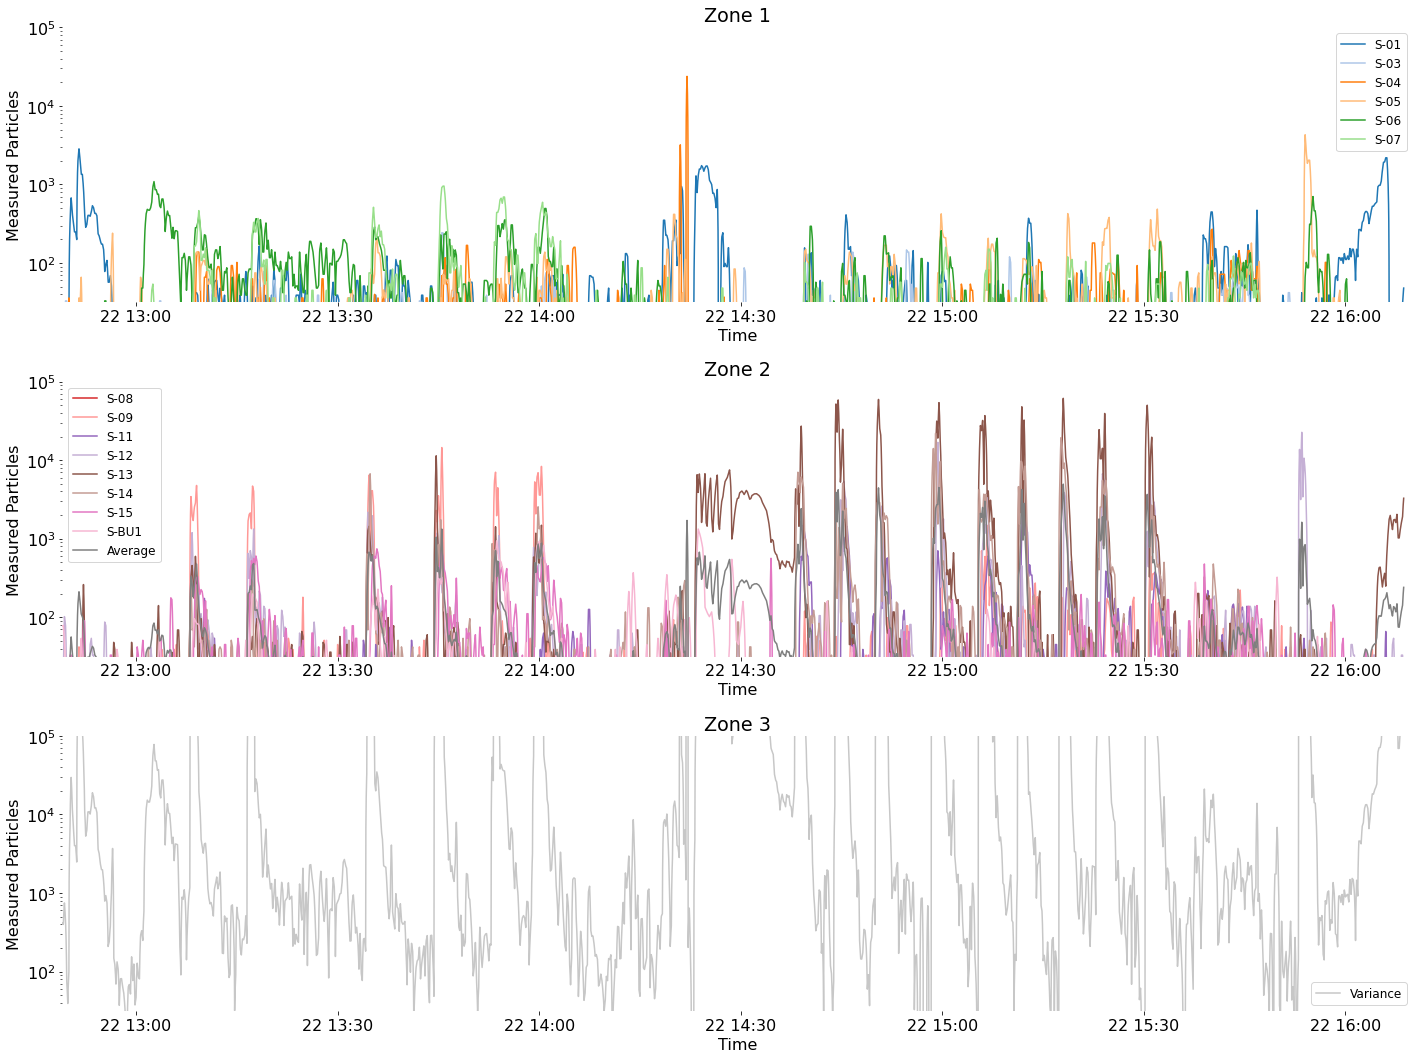

In [20]:

fig,sPlt=plt.subplots(3,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    # if sensor in ['S-02','S-03','S-05']:
    #     continue
    if idx < 6:
        num = 0
    elif idx < 15:
        num = 1
    else:
        num = 2

    yData = DataFrame[sensor]
    xData = DataFrame["Date_Time"]

    sPlt[num].plot(xData,yData,color = color[idx],label = sensor)

for i in range(3):

    sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sensor = ['Zone 1','Zone 2','Zone 3']
    sPlt[i].set(title=sensor[i],xlabel='Time',ylabel='Measured Particles')
    
    # yData = DataFrame[DataFrame.keys()[21+i*2]]
    # xData = DataFrame["Date_Time"]
    # sPlt[i].plot(xData,yData,color = "Black",label = "Average",linewidth=2)
    # sPlt[i].grid(color='black', linestyle='--', linewidth=.1)



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    ax.legend(prop={'size':12})
    # ax.legend(loc="upper right")
    ax.set_ylim([10**1.5,10**5])
    ax.set_xlim([pd.Timestamp('12/22/2020 12:49:00'),pd.Timestamp('12/22/2020 16:10:00')])
    ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


## Plots of Avg Zone reading with Avg sensor reading

In [21]:
# stExpDf[key + ' Exp '+str(i)]#[sensors[idx]]
# numExps
# [i for i,s in enumerate(stExpDf.keys()) if key in s]
# stExpDf.keys()

In [22]:
len(set(ZoneAssignments.iloc[:,1]))

4

In [23]:
idx

15

In [24]:
DataFrame.keys()

Index(['Date_Time', 'S-01', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07', 'S-08',
       'S-09', 'S-11', 'S-12', 'S-13', 'S-14', 'S-15', 'S-BU1', 'Average',
       'Variance'],
      dtype='object')

In [25]:
idx

15

In [26]:
ZoneAssignments

OR7 Unblocked  OR7 Blocked  OR16 Unblocked  OR16 Blocked 1  OR16 Blocked 2
0               2            2               2               2               2
1               2            2               2               2               2
2               2            2               2               2               2
3               2            2               2               2               2
4               2            2               2               2               2
5               2            2               2               2               2
6               2            2               2               2               2
7               1            1               1               1               1
8               1            1               1               1               1
9               1            1               1               1               1
10              0            0               0               0               0
11              0            0               0               0               0
12              2            2               2               2               2
13              3            3               3               3               3

In [27]:
DataFrame

Date_Time  S-01  S-03  S-04  S-05  S-06  S-07  S-08  S-09  \
0     2020-12-22 12:49:00   0.0   0.0   0.0   0.0  18.0   0.0   0.0   9.0   
1     2020-12-22 12:49:01   0.0   0.9   0.0   0.0  18.0   0.0   0.0   9.0   
2     2020-12-22 12:49:02   0.0   1.8   0.0   0.0  18.0   0.0   0.0   9.0   
3     2020-12-22 12:49:03   0.0   2.7   0.0   0.0  18.0   0.0   0.0   9.0   
4     2020-12-22 12:49:04   0.0   3.6   0.0   0.0  18.0   0.0   0.0   9.0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
11976 2020-12-22 16:08:36  40.8   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11977 2020-12-22 16:08:37  42.6   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11978 2020-12-22 16:08:38  44.4   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11979 2020-12-22 16:08:39  46.2   0.0   0.0   0.0   0.0   9.0   0.0   0.0   
11980 2020-12-22 16:08:40  48.0   0.0   0.0   0.0   0.0   9.0   0.0   0.0   

       S-11  S-12    S-13  S-14  S-15  S-BU1     Average       Variance  
0       0.0   0.0     0.0  21.0   0.0   78.0    9.000000     414.000000  
1       0.0   0.0     0.9  18.9   0.0   78.0    8.978571     412.388265  
2       0.0   0.0     1.8  16.8   0.0   78.0    8.957143     410.776531  
3       0.0   0.0     2.7  14.7   0.0   78.0    8.935714     409.164796  
4       0.0   0.0     3.6  12.6   0.0   78.0    8.914286     407.553061  
...     ...   ...     ...   ...   ...    ...         ...            ...  
11976   0.0  13.2  2730.0   5.4   9.0    7.8  201.085714  521728.432653  
11977   0.0   9.9  2866.5   6.3   9.0    9.1  210.885714  568556.518367  
11978   0.0   6.6  3003.0   7.2   9.0   10.4  220.685714  615384.604082  
11979   0.0   3.3  3139.5   8.1   9.0   11.7  230.485714  662212.689796  
11980   0.0   0.0  3276.0   9.0   9.0   13.0  240.285714  709040.775510  

[11981 rows x 17 columns]

In [28]:
trails = list(stExpDf.keys())
expirements = list(stAvgDf.keys())
[i for i in trails if expirements[0] in i]



['OR16 Blocked 1 Exp 1', 'OR16 Blocked 1 Exp 2', 'OR16 Blocked 1 Exp 3']

In [29]:
ZoneAssignments

OR7 Unblocked  OR7 Blocked  OR16 Unblocked  OR16 Blocked 1  OR16 Blocked 2
0               2            2               2               2               2
1               2            2               2               2               2
2               2            2               2               2               2
3               2            2               2               2               2
4               2            2               2               2               2
5               2            2               2               2               2
6               2            2               2               2               2
7               1            1               1               1               1
8               1            1               1               1               1
9               1            1               1               1               1
10              0            0               0               0               0
11              0            0               0               0               0
12              2            2               2               2               2
13              3            3               3               3               3

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


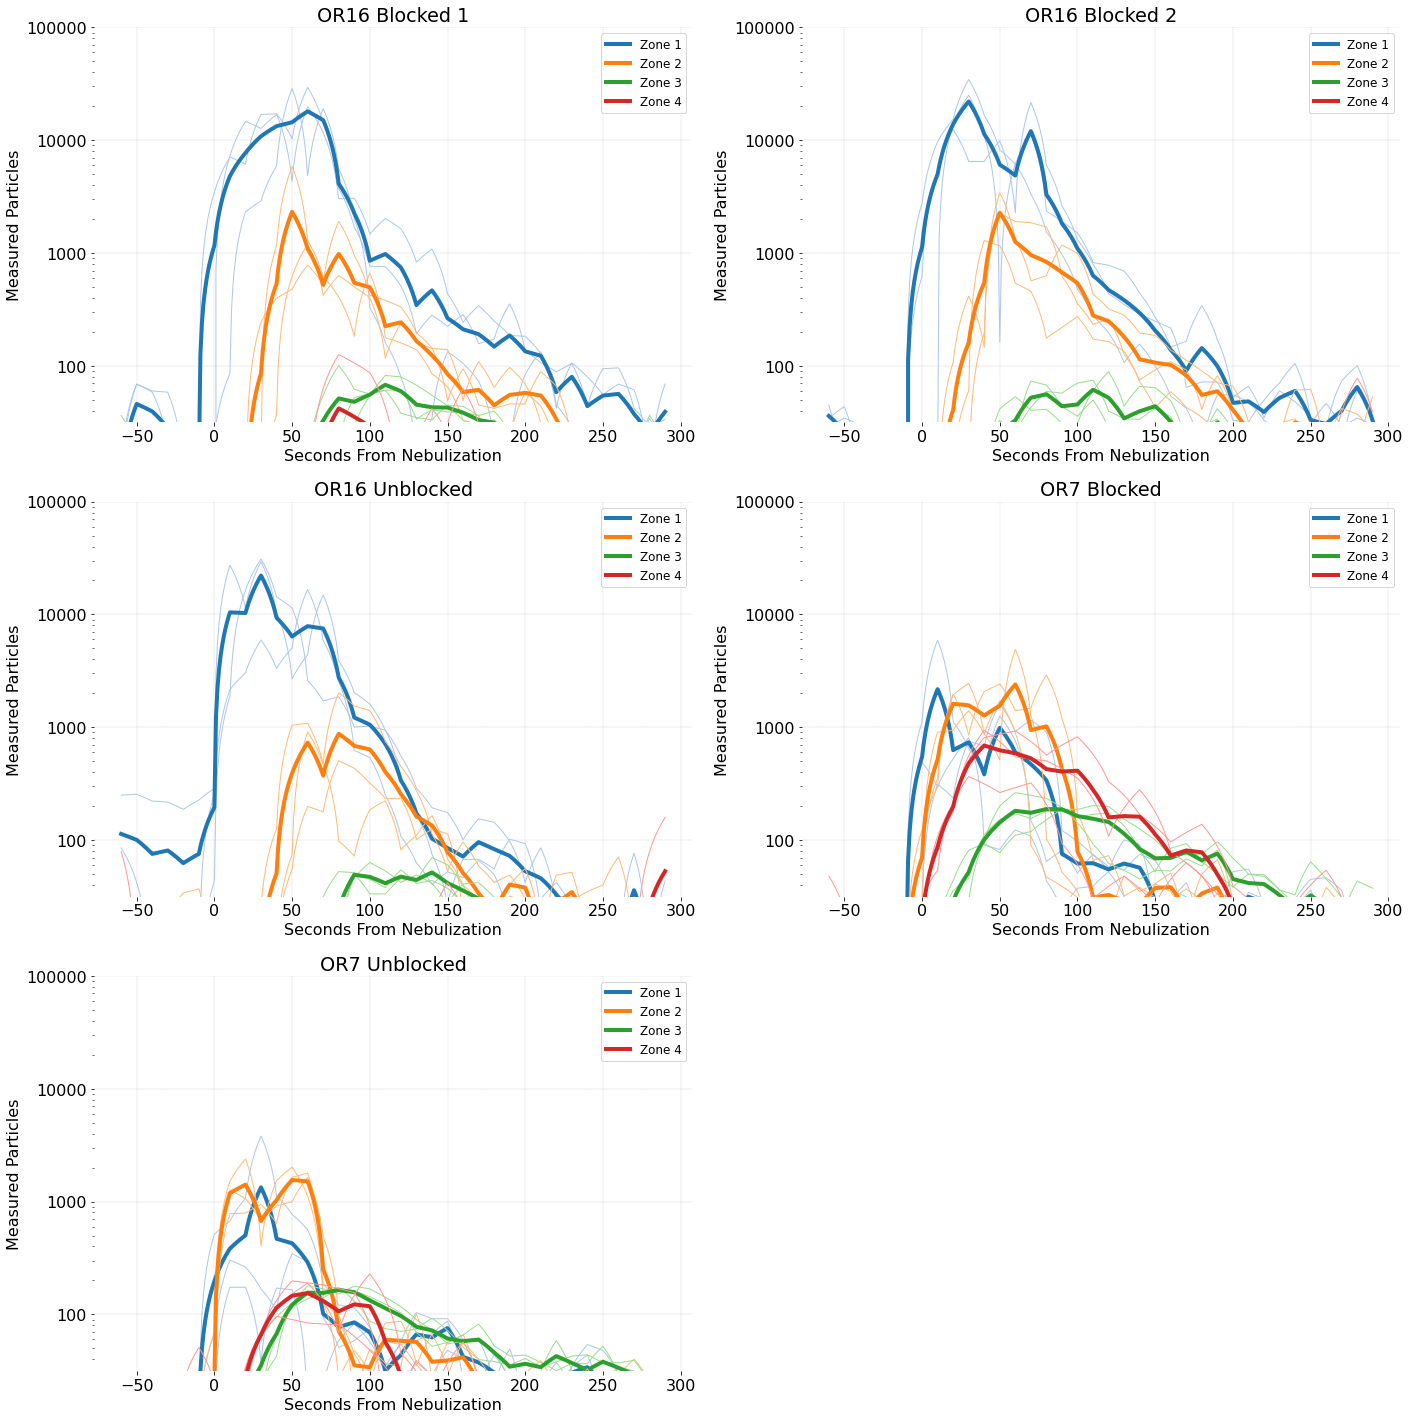

In [45]:

size = len(stAvgDf)
fig,sPlt=plt.subplots(3,2,sharex=False,sharey=False,figsize=(20,20))
#fig.suptitle("March 22nd Data",fontsize=30)
numZones = len(set(ZoneAssignments.iloc[:,1]))

zones = ['Zone '+str(i+1) for i in range(numZones)]
trails = list(stExpDf.keys())
zoneFrame = {}
for iteration,key in enumerate(stAvgDf):
    # fig.delaxes(sPlt[1,1])
    index = [0 if iteration < 2 else 1 if iteration < 4 else 2][0]

    DataFrame = stAvgDf[key]
    sensors = list(DataFrame.keys())[:(-2-numZones+1)]
    numExps = len([i for i,s in enumerate(stExpDf.keys()) if key in s])
    zoneFrame[key] = {}
    # creates a zoneFrame, which is a dictionary that will store of the sensor data for each zone for individual sensor plots
    for zone in range(numZones):
        zoneFrame[key][zone] = pd.DataFrame()

    for idx,zone in enumerate(ZoneAssignments[key]):
        for i in range(numExps):
            # print(idx)
            yData = stExpDf[key + ' Exp '+str(i+1)][sensors[idx]]
            zoneFrame[key][zone][sensors[idx] + ' Exp ' + str(i)] = yData


    for idx in range(numZones):
        # sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
        # sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 

        for trail in [i for i in trails if key in i]:
            # print([0 if iteration < 1 else 1],[iteration%2])
            # print(trail,idx)
            yExpData = stExpDf[trail][zones[idx]]
            xExpData = [i for i in range(-60,len(yData)-60)]
            sPlt[index][iteration%2].plot(xExpData,yExpData,color = color[idx*2+1],linewidth=1)

        yData = DataFrame[zones[idx]]
        yError = np.var(zoneFrame[key][idx],axis = 1)**.5
        xData = [i for i in range(-60,len(yData)-60)]

        # sPlt[iteration].errorbar(xData,yData,yerr=yError,ecolor = color[idx*2+1],color = color[idx*2],label = zones[idx],linewidth=4)

        sPlt[index][iteration%2].plot(xData,yData,color = color[idx*2],label = zones[idx],linewidth=4)

    sPlt[index][iteration%2].grid(color='black', linestyle='--', linewidth=.1)
    sPlt[index][iteration%2].set(title=key,xlabel='Seconds From Nebulization',ylabel='Measured Particles')


    for el in sPlt:
        for ax in el:
            ax.spines["top"].set_visible(False)   
            ax.spines["bottom"].set_visible(False)    
            ax.spines["right"].set_visible(False)    
            ax.spines["left"].set_visible(False) 
            ax.legend(prop={'size':12})
            # ax.legend(loc="upper right")
            ax.set_ylim([10**1.5,10**5])
            # ax.set_xlim([pd.Timestamp(startTime),pd.Timestamp(endTime)])
            ax.set_yscale("log")
            ax.yaxis.set_major_formatter(ScalarFormatter())
    # break
        
        
plt.tight_layout()
plt.rcParams.update({'font.size':16})
fig.delaxes(sPlt[2][1])
plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\Quad_12-21.png")
    # break
# mpld3.save_html(fig,'ZonedVariances.html')



In [31]:
zoneTracker={}
for key in ZoneAssignments:
    for idx,zone in enumerate(ZoneAssignments[key]):
        print(sensors[idx],zone)

S-01 2
S-03 2
S-04 2
S-05 2
S-06 2
S-07 2
S-08 2
S-09 1
S-11 1
S-12 1
S-13 0
S-14 0
S-15 2
S-BU1 3
S-01 2
S-03 2
S-04 2
S-05 2
S-06 2
S-07 2
S-08 2
S-09 1
S-11 1
S-12 1
S-13 0
S-14 0
S-15 2
S-BU1 3
S-01 2
S-03 2
S-04 2
S-05 2
S-06 2
S-07 2
S-08 2
S-09 1
S-11 1
S-12 1
S-13 0
S-14 0
S-15 2
S-BU1 3
S-01 2
S-03 2
S-04 2
S-05 2
S-06 2
S-07 2
S-08 2
S-09 1
S-11 1
S-12 1
S-13 0
S-14 0
S-15 2
S-BU1 3
S-01 2
S-03 2
S-04 2
S-05 2
S-06 2
S-07 2
S-08 2
S-09 1
S-11 1
S-12 1
S-13 0
S-14 0
S-15 2
S-BU1 3


<AxesSubplot:>

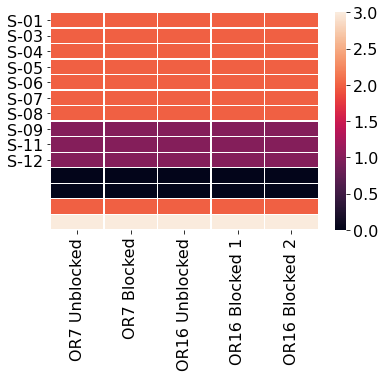

In [32]:
sns.heatmap(ZoneAssignments,yticklabels = sensors[:-5],label='x-small',linecolor='white',linewidths=.25)

In [33]:
indexList = {}
thresh = 1.5
for notUse,x in enumerate(stAvgDf):
    switch = 1
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])/np.log(10)):
        if i <= thresh:
            if not switch:
                indexList[x] = idx-120
                switch = 1
                # print(stAvgDf[x]['Average'][idx])
        else:
            switch = 0
    if not switch:
        indexList[x] = idx-120
    print(indexList[x],'seconds',x)

155 seconds OR16 Blocked 1
138 seconds OR16 Blocked 2
132 seconds OR16 Unblocked
153 seconds OR7 Blocked
125 seconds OR7 Unblocked


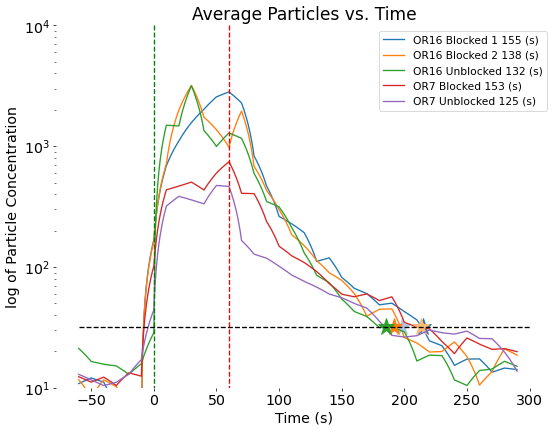

In [46]:
for idx,x in enumerate(stAvgDf):
    # if re.match("OR16",x):
    #     continue
    fig = plt.figure(0, figsize=(10,7.5), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],yData,color = color[idx*2],label = x + ' ' + str(xData) + ' (s)')

    ax.plot([xData+60],[10**thresh],'*',ms=20,color = color[idx])
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')

## plotting lines here
ax.plot([-60,300],[10**thresh]*2,'--',color = 'black')
ax.plot([0,0],[10**4,1],'--',color = 'green')
ax.plot([60,60],[10**4,1],'--',color = 'red')

plt.yscale("log")

plt.ylim([10,10**4])

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time')
ax.spines["top"].set_visible(False)   
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.legend(prop={'size':12})
plt.rcParams.update({'font.size':15})
ax.fill_between([0,60], [1,3], [1,3],facecolor='green',where=True, alpha=0.5)
plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\Avg_12-21.png")
# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

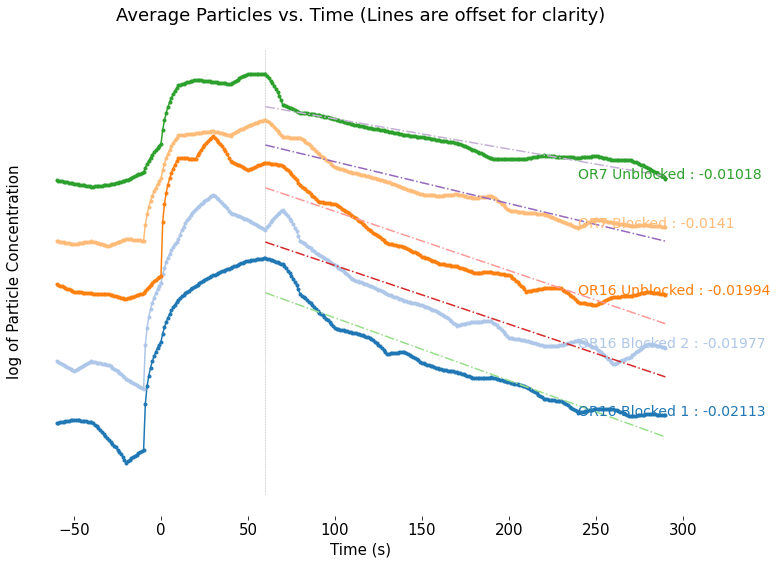

In [35]:
fig = plt.figure(0,figsize=(12,9))
ax = plt.subplot(111)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().set_ticks([]) 
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time (Lines are offset for clarity)')
plt.plot([60,60], [0,15], "--", lw=0.5, color="black", alpha=0.3)  
spaceFactor = 2

for idx,x in enumerate(stAvgDf):

    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    yPoints = np.log(stAvgDf[x]['Average'][120:])
    xPoints = np.array([i+60 for i in range(len(yPoints))])
    m,b = np.polyfit(xPoints,yPoints,1)
    
    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)+idx*spaceFactor,'.-',color = tableau20[idx],label = x + ': Coefficient  ' + str(round(m,3)) )

    ax.plot(xPoints,m*xPoints+b+idx*spaceFactor,'-.',color = tableau20[idx+5])
    y_pos = yPoints.values[-1] + idx*spaceFactor
    plt.text(240, y_pos, x + ' : '+str(round(m,5)), fontsize=14, color=tableau20[idx])    

# # #For Exporting
# mpld3.save_html(fig,'ParticleCountsWithFit.html')


### Plotting Data for Sensors

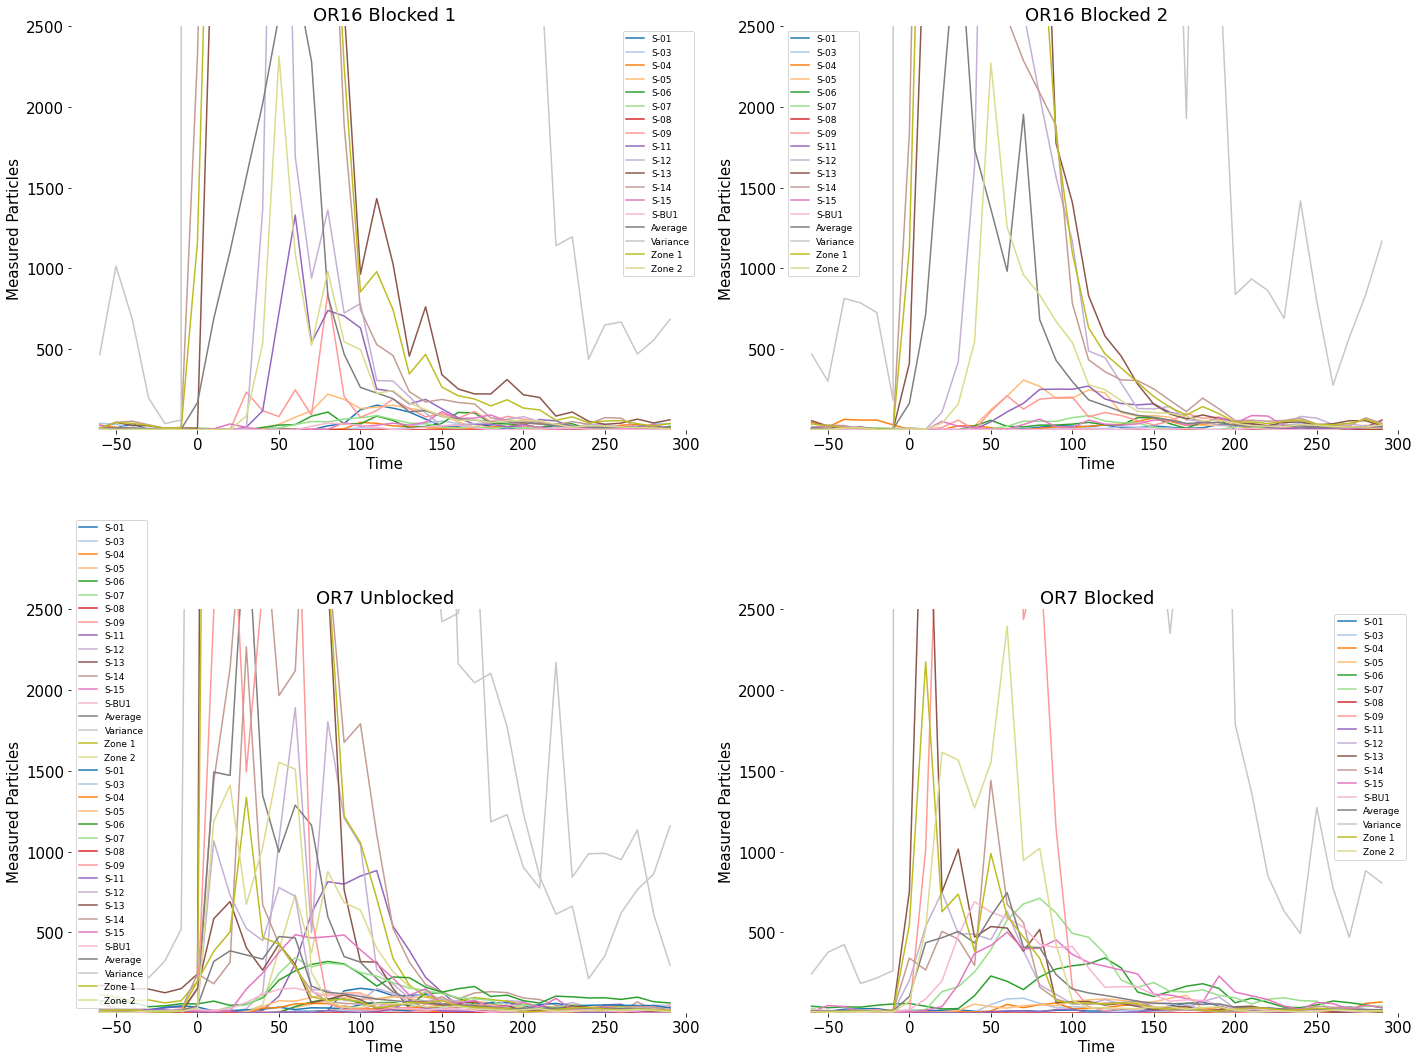

In [36]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[:18]):
        # if zone == 'S-13':
        #     continue
        yData = (DataFrame[x][zone])
        xData = [i for i in range(-60,len(yData)-60)]

        sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)

    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='Measured Particles')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':9})
        ax.set_ylim([1,2500])


plt.tight_layout()
plt.rcParams.update({'font.size':22})


### Plotting Data for Zones

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


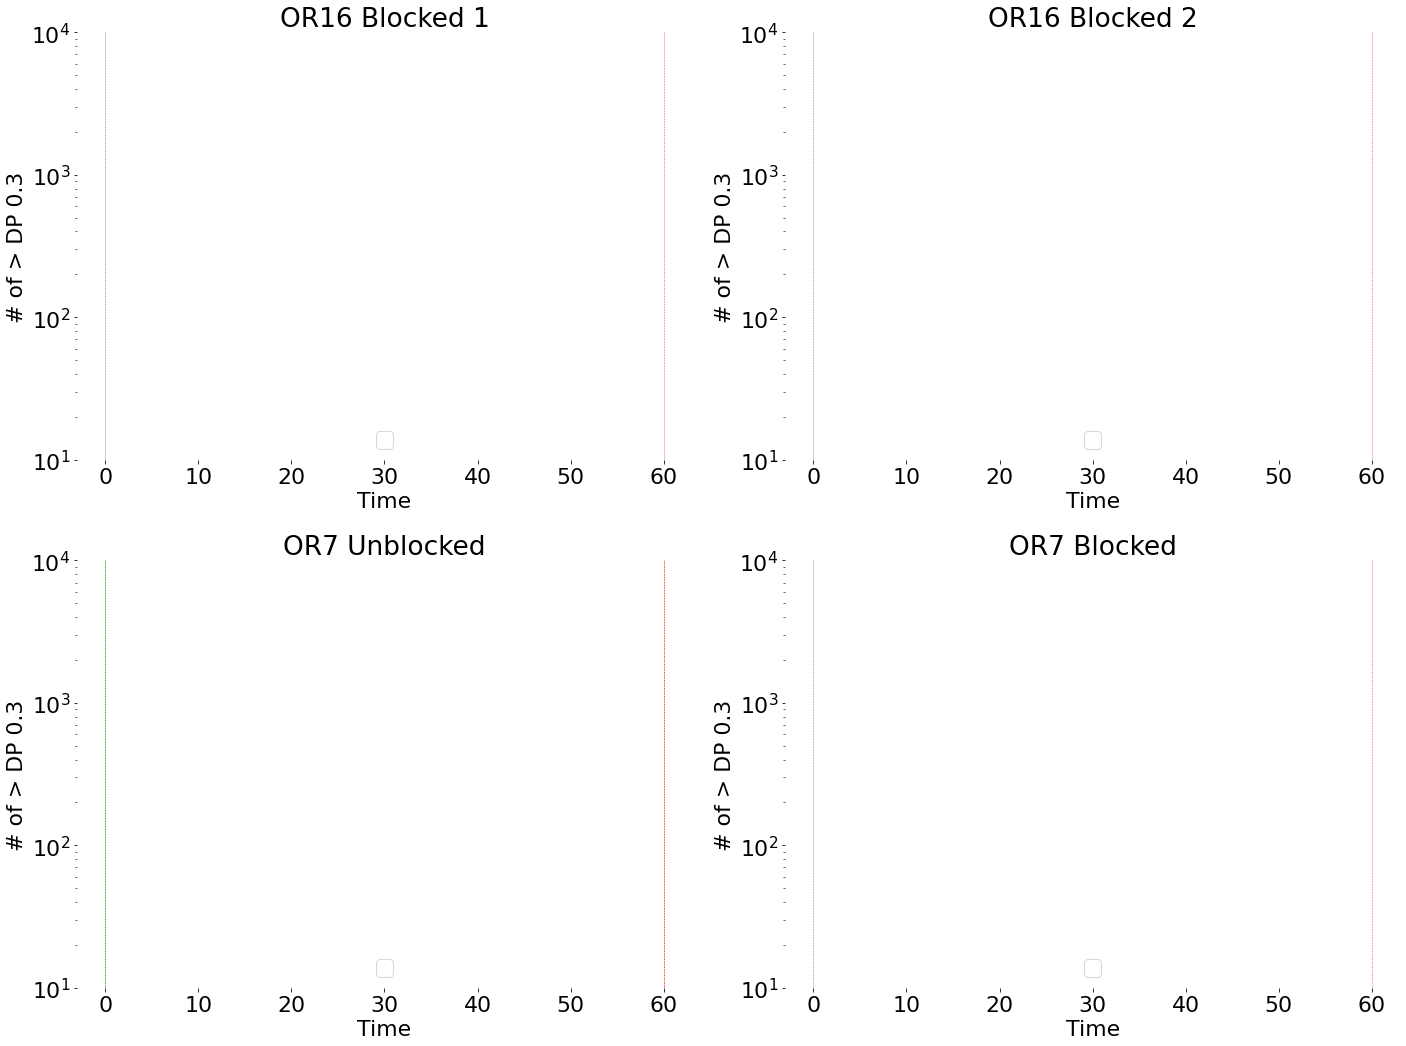

In [37]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[20:]):
        # if True: 

        if re.match(r"Zone",zone):

            yData = (DataFrame[x][zone])
            xData = [i for i in range(-60,len(yData)-60)]

            sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)
            
    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [1,10**4.5], "--", lw=0.5, color="red", alpha=0.75)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [1,10**4.5], "--", lw=0.5, color="green", alpha=0.75) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='# of > DP 0.3')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend()
        ax.set_yscale('log')
        ax.set_ylim([10,10**4])

# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})





In [38]:
DataFrame[x].columns[18:]

Index(['Zone 3', 'Zone 4'], dtype='object')

In [39]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stExpDf
for idx,x in enumerate(DataFrame):
    index = math.floor(idx/3)
    yData = DataFrame[x]
    xData = [i for i in range(-60,len(yData)-60)]
    for loop,zone in enumerate(DataFrame[x].columns[20:]):
            if not loop%2:
                sPlt[1 if index > 1 else 0][index%2].plot(xData,yData[zone],color = color[loop],label = zone)
`
    sPlt[1 if index > 1 else 0][index%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if index > 1 else 0][index%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if index > 1 else 0][index%2].set(title=x,xlabel='Time',ylabel='Measured Particles')

for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(loc="upper right")
        ax.set_ylim([1,10**3.5])
# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})


SyntaxError: invalid syntax (<ipython-input-39-b933989f014b>, line 11)